# Data Understanding

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "dataset"

tourism = pd.read_csv(f"{DATA_PATH}/tourism_with_id.csv")
tourism_rating = pd.read_csv(f"{DATA_PATH}/tourism_rating.csv")
users = pd.read_csv(f"{DATA_PATH}/user.csv")

In [28]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
32,33,Taman Suropati,Taman Suropati (awalnya bernama Burgemeester B...,Taman Hiburan,Jakarta,0,4.6,NaN,"{'lat': -6.1994034, 'lng': 106.8326228}",-6.199403,106.832623,NaN,33
429,430,Atlantis Land Surabaya,"Sejak diresmikan pada bulan Desember 2017, Atl...",Taman Hiburan,Surabaya,125000,4.4,120.0,"{'lat': -7.2516189, 'lng': 112.8009694}",-7.251619,112.800969,NaN,430
60,61,Tugu Proklamasi,Tugu Proklamasi adalah tugu peringatan proklam...,Budaya,Jakarta,0,4.6,NaN,"{'lat': -6.2030468, 'lng': 106.8466623}",-6.203047,106.846662,NaN,61
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
389,390,Durian Gardens and Tourism Education Watu Simbar,"Perlu diketahui, watu simbar ini merupakan lok...",Cagar Alam,Semarang,5000,4.1,45.0,"{'lat': -7.096707899999999, 'lng': 110.3900517}",-7.096708,110.390052,NaN,390


In [29]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
6162,185,176,1
5593,169,362,5
5232,159,178,1
5791,174,152,5
1174,37,311,2


In [30]:
users.sample(5)

,User_Id,Location,Age
175,176,"Depok, Jawa Barat",31
154,155,"Surabaya, Jawa Timur",37
52,53,"Subang, Jawa Barat",28
204,205,"Bandung, Jawa Barat",24
156,157,"Yogyakarta, DIY",28


In [31]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


# Exploratory Data Analysis

In [32]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [33]:
info_tourism.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [34]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [35]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [36]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [37]:
users.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

In [38]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

# Data Preprocessing

In [39]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [40]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [41]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya
...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah


In [42]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [43]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,Bandung Tempat Ibadah


# Data Preparation

## Missing Values

In [44]:
all_tourism.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
Place_Name       0
Description      0
City             0
Category         0
city_category    0
dtype: int64

In [45]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,Jakarta Cagar Alam


In [46]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

In [47]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category
})

tourism_new

,id,name,category,description,city,city_category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya
...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam


In [48]:
top_10 = tourism_new['id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10,preparation[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot('Place_Id', 'Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

KeyError: 'index'

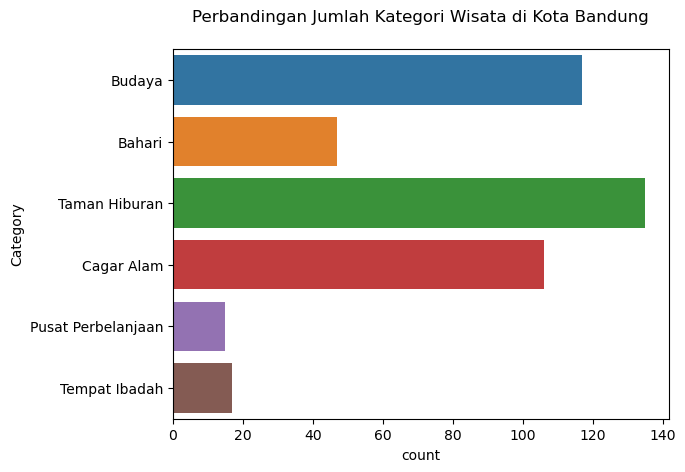

In [49]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

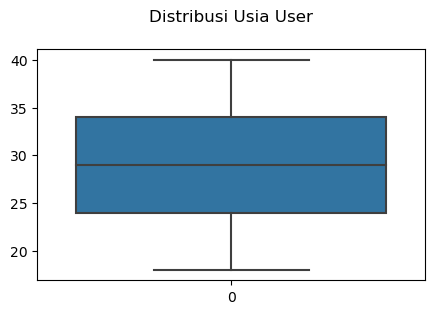

In [50]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

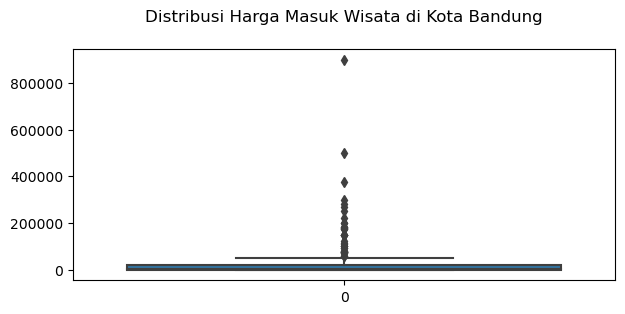

In [51]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

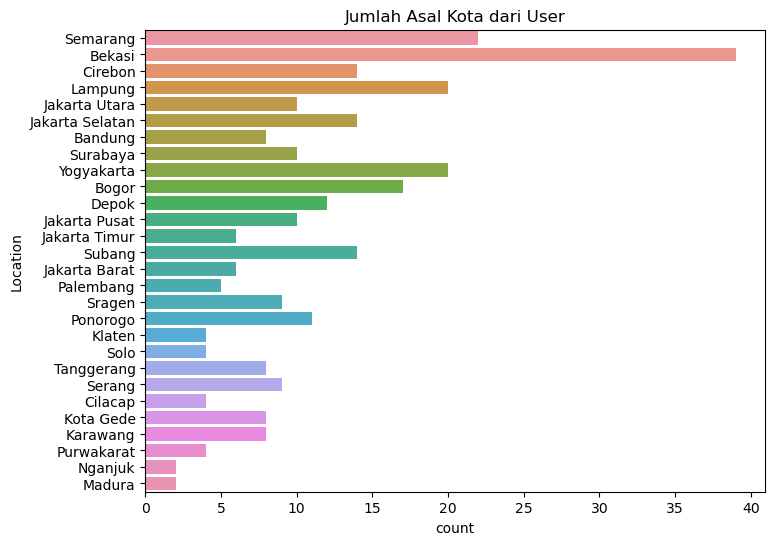

In [52]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

#### 

# Content Based Filtering

In [53]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category
393,79,Taman Spathodea,Taman Hiburan,Objek Wisata Taman Spathodea di Jagakarsa DKI ...,Jakarta,Jakarta Taman Hiburan
94,14,Pulau Pelangi,Bahari,Pulau Pelangi adalah sebuah pulau yang terleta...,Jakarta,Jakarta Bahari
361,356,Saloka Theme Park,Taman Hiburan,SALOKA hadir sebagai taman rekreasi terbesar d...,Semarang,Semarang Taman Hiburan
182,264,Gereja Katedral Santo Petrus Bandung,Tempat Ibadah,"Gereja Katedral Bandung, atau Katedral Santo P...",Bandung,Bandung Tempat Ibadah
341,60,Museum Tekstil,Budaya,Museum cinta Tekstil menempati gedung tua di J...,Jakarta,Jakarta Budaya


## TF-IDF Vectorizer

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [55]:
cv_matrix = cv.transform(data['city_category']) 
 
cv_matrix.shape 

(437, 15)

In [56]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [57]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Taman Badak,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
Bumi Perkemahan Batu Kuda,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Pasar Kebon Empring Bintaran,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
Museum Benteng Vredeburg Yogyakarta,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Jogja Bay Pirates Adventure Waterpark,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


## Cosine Similarity

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [59]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Pasar Taman Puring,Curug Cimahi,Monumen Serangan Umum 1 Maret,Pasar Kebon Empring Bintaran,Jakarta Planetarium
name,,,,,
Taman Situ Lembang,0.333333,0.000000,0.666667,0.000000,1.000000
Gunung Papandayan,0.000000,1.000000,0.000000,0.000000,0.000000
Jembatan Pasupati,0.000000,0.333333,0.666667,0.000000,0.666667
Kampoeng Kopi Banaran,0.000000,0.000000,0.666667,0.000000,0.666667
Kota Lama Semarang,0.000000,0.000000,0.000000,0.000000,0.000000
Taman Lapangan Banteng,0.333333,0.000000,0.666667,0.000000,1.000000
Gereja Tiberias Indonesia Bandung,0.000000,0.333333,0.000000,0.000000,0.000000
Masjid Pusdai,0.000000,0.333333,0.000000,0.000000,0.000000
Pantai Sanglen,0.000000,0.000000,0.408248,0.408248,0.000000


## Recommendation

In [60]:
def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(place_name,errors='ignore')
    
    return pd.DataFrame(closest).merge(items).head(k)

In [61]:
tourism_recommendations("Air Mancur Menari")

,name,category,description,city
0,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya
1,Taman Pelangi,Taman Hiburan,Kalau pelangi biasanya ada di siang hari pasca...,Surabaya
2,Atlantis Land Surabaya,Taman Hiburan,"Sejak diresmikan pada bulan Desember 2017, Atl...",Surabaya
3,Taman Buah Surabaya,Taman Hiburan,Wisata Taman Buah Undaan di Surabaya adalah sa...,Surabaya
4,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya


In [62]:
tourism_recommendations("Trans Studio Bandung")

,name,category,description,city
0,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung
1,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung
2,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung
3,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung
4,NuArt Sculpture Park,Taman Hiburan,NuArt Sculpture Park ini merupakan sebuah gall...,Bandung


# Collaborative Filtering

In [63]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

2024-05-08 22:10:08.751568: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 22:10:08.754312: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-08 22:10:08.791202: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 22:10:09.457648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [64]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Data Preparation

### Encode

In [65]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [66]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [67]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [68]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

In [69]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [70]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


## Training

In [71]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) 
    self.place_embedding = layers.Embedding( 
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_place = tf.tensordot(user_vector, place_vector, 2) 
 
    x = dot_user_place + user_bias + place_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [72]:
model = RecommenderNet(num_users, num_place, 100)
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

2024-05-08 22:10:14.463553: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-08 22:10:14.464106: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [73]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6965 - root_mean_squared_error: 0.3485 - val_loss: 0.6930 - val_root_mean_squared_error: 0.3447
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6882 - root_mean_squared_error: 0.3396 - val_loss: 0.6935 - val_root_mean_squared_error: 0.3450
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 0.6857 - root_mean_squared_error: 0.3410 - val_loss: 0.6954 - val_root_mean_squared_error: 0.3463
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 0.6775 - root_mean_squared_error: 0.3308 - val_loss: 0.6970 - val_root_mean_squared_error: 0.3475
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 0.6758 - root_mean_squared_error: 0.3317 - val_loss: 0.6991 - val_root_mean_squared_error: 0.3489
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6713 - root_mean_squared_error: 0.3277 - val_loss: 0.6989 - val_root_mean_squared_error: 0.3488
Epoch 7/100
1000/1000 ━━━━━━

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - loss: 0.6571 - root_mean_squared_error: 0.3186 - val_loss: 0.7170 - val_root_mean_squared_error: 0.3598
Epoch 43/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 0.6516 - root_mean_squared_error: 0.3125 - val_loss: 0.7179 - val_root_mean_squared_error: 0.3604
Epoch 44/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 0.6555 - root_mean_squared_error: 0.3134 - val_loss: 0.7196 - val_root_mean_squared_error: 0.3615
Epoch 45/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step - loss: 0.6501 - root_mean_squared_error: 0.3153 - val_loss: 0.7213 - val_root_mean_squared_error: 0.3626
Epoch 46/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 0.6565 - root_mean_squared_error: 0.3184 - val_loss: 0.7208 - val_root_mean_squared_error: 0.3622
Epoch 47/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 0.6560 - root_mean_squared_error: 0.3180 - val_loss: 0.7202 - val_root_mean_squared_error: 0.3617
Epoch 48/100
1000/1000 ━━━━━━

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 974us/step - loss: 0.6541 - root_mean_squared_error: 0.3161 - val_loss: 0.7197 - val_root_mean_squared_error: 0.3613
Epoch 84/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 0.6528 - root_mean_squared_error: 0.3138 - val_loss: 0.7188 - val_root_mean_squared_error: 0.3607
Epoch 85/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.6541 - root_mean_squared_error: 0.3167 - val_loss: 0.7184 - val_root_mean_squared_error: 0.3604
Epoch 86/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 0.6575 - root_mean_squared_error: 0.3158 - val_loss: 0.7199 - val_root_mean_squared_error: 0.3613
Epoch 87/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 0.6558 - root_mean_squared_error: 0.3173 - val_loss: 0.7217 - val_root_mean_squared_error: 0.3624
Epoch 88/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - loss: 0.6554 - root_mean_squared_error: 0.3158 - val_loss: 0.7218 - val_root_mean_squared_error: 0.3625
Epoch 89/100
1000/1000 ━━━━━━

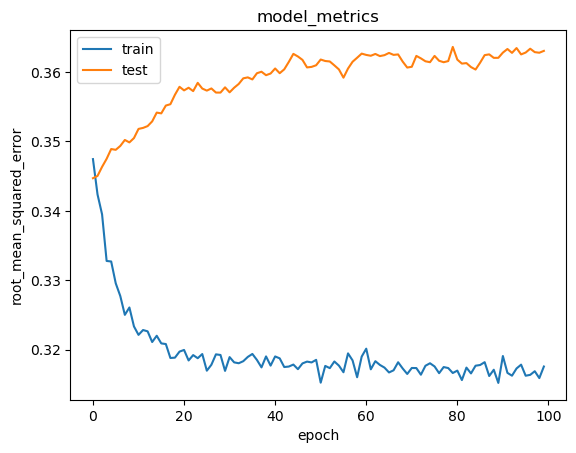

In [74]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

In [75]:
place_df = tourism_new
df = pd.read_csv(f'{DATA_PATH}/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [76]:
ratings = model.predict(user_place_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Showing recommendations for users: 197
Place with high ratings from user
--------------------------------


,id,name,category,description,city,city_category
80,198,Pantai Greweng,Bahari,"Di Kabupaten Gunungkidul, tidak sulit memilih ...",Yogyakarta,Yogyakarta Bahari
106,300,Sanghyang Heuleut,Cagar Alam,Danau yang satu ini memiliki air jernih bernua...,Bandung,Bandung Cagar Alam
222,429,House of Sampoerna,Budaya,House of Sampoerna adalah sebuah museum tembak...,Surabaya,Surabaya Budaya
351,299,Sendang Geulis Kahuripan,Cagar Alam,Wilayah ini lebih tepatnya berada di RPH Cikal...,Bandung,Bandung Cagar Alam
355,423,Patung Sura dan Buaya,Budaya,Patung Sura dan Baya (Jawa: Patung Suro lan Bo...,Surabaya,Surabaya Budaya


In [77]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category
16,67,Margasatwa Muara Angke,Cagar Alam,Suaka margasatwa Muara Angke adalah sebuah kaw...,Jakarta,Jakarta Cagar Alam
93,44,Monumen Selamat Datang,Budaya,Monumen Selamat Datang adalah sebuah monumen y...,Jakarta,Jakarta Budaya
187,416,Keraton Surabaya,Budaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Surabaya,Surabaya Budaya
195,36,Skyrink - Mall Taman Anggrek,Taman Hiburan,Salah satu arena ice skating Jakarta adalah Ic...,Jakarta,Jakarta Taman Hiburan
235,52,Kampung Cina,Budaya,KAMPUNG China adalah hunian dan kawasan perdag...,Jakarta,Jakarta Budaya
308,34,Pasar Taman Puring,Pusat Perbelanjaan,Taman Puring bukanlah taman secara harfiah. Se...,Jakarta,Jakarta Pusat Perbelanjaan
341,60,Museum Tekstil,Budaya,Museum cinta Tekstil menempati gedung tua di J...,Jakarta,Jakarta Budaya
384,157,Pantai Baron,Bahari,Pantai Baron adalah salah satu objek wisata be...,Yogyakarta,Yogyakarta Bahari
422,232,Bukit Moko,Cagar Alam,Bandung sebagai destinasi wisata tak pernah ad...,Bandung,Bandung Cagar Alam
428,51,Jakarta Planetarium,Taman Hiburan,Planetarium dan Observatorium Jakarta adalah s...,Jakarta,Jakarta Taman Hiburan
